# Classification

In [30]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.base import clone
import numpy as np

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=25, tol=None, random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(max_iter=25, random_state=42, tol=None)

In [32]:
y_pred = sgd_clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9333333333333333

## Cross-validation

Options for cross validation

In [33]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)

fold_accuracies = []
for train_index, test_index in skfolds.split(X_train, y_train):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    fold_accuracies.append(n_correct / len(y_pred))

fold_accuracies

[0.825, 0.675, 0.8]

In [34]:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")
cross_val_scores.mean()

0.7666666666666666

### Confusion Matrix

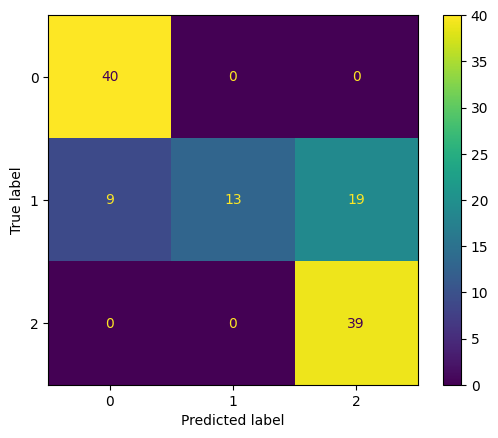

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
matrix = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(matrix).plot()

### Measures

In [36]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.base import clone
import numpy as np

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, (iris.target == 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=25, tol=None, random_state=42)
sgd_clf.fit(X_train, y_train)
y_pred = sgd_clf.predict(X_test)

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
f = f1_score(y_test, y_pred)

print(f"{p=}, {r=}, {f=}")

p=0.3333333333333333, r=1.0, f=0.5


## How a classifier decides the class
To assign a class a classifier uses a threshold, we can set it manually using the decision function

In [40]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.base import clone
import numpy as np

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=25, tol=None, random_state=42)
sgd_clf.fit(X_train, y_train)
y_pred = sgd_clf.predict(X_test)

In [46]:
y_scores = sgd_clf.decision_function(X_test)

In [43]:
threshold = 0
y_test_pred = (y_scores > threshold)

In [44]:
threshold = -300000
y_test_pred = (y_scores > threshold)

If you want to obtain scores instead of classes you can use set method="decision_function"

In [50]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3, method="decision_function")

Setting manually a threshold is not a common approach.

A better way is to plot the precision recall curve.

## ROC AUC

### ROC AUC simple

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg.fit(X_train, y_train)

y_prob = log_reg.predict_proba(X_test)[:, 1]


<Figure size 640x480 with 0 Axes>

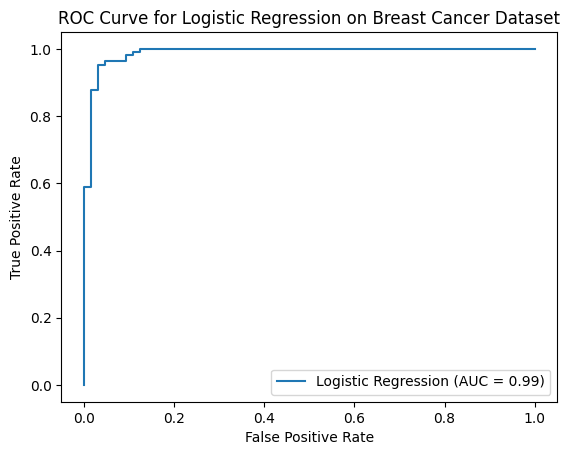

Area Under the ROC Curve (AUC): 0.9888


In [52]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc = roc_auc_score(y_test, y_prob)

plt.figure()
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Logistic Regression').plot()
plt.title('ROC Curve for Logistic Regression on Breast Cancer Dataset')
plt.show()

print(f"Area Under the ROC Curve (AUC): {auc:.4f}")


### Multi class plotting roc curve

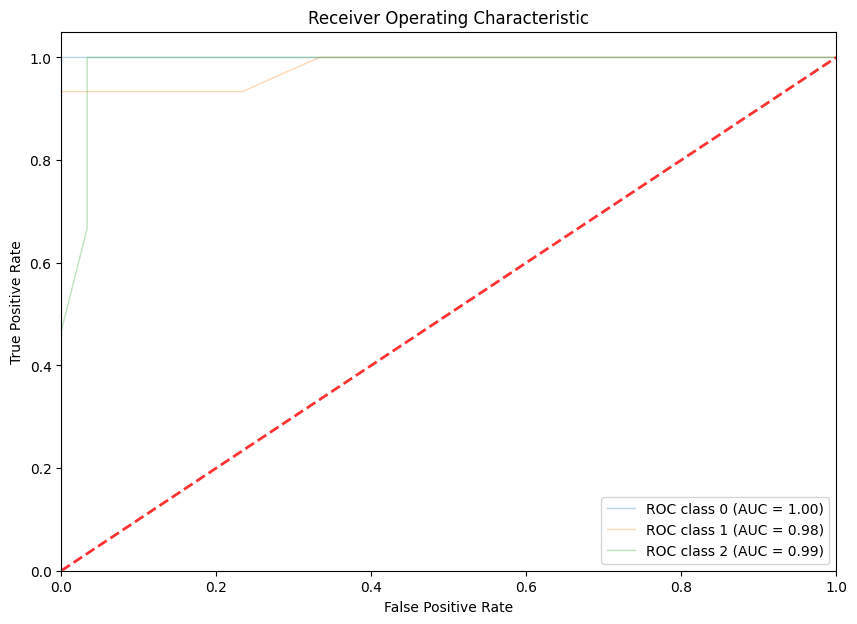

In [57]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Binarize the output
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Initialize the classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Lists for storing true positive rates and AUCs
tprs = [[] for _ in range(n_classes)]
aucs = [[] for _ in range(n_classes)]
plt.figure(figsize=(10, 7))

# Mean false positive rate for interpolation
mean_fpr = np.linspace(0, 1, 100)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Fit the classifier
rf_clf.fit(X_train, y_train)
y_score = rf_clf.predict_proba(X_test)

# Binarize y_test
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
for j in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, j], y_score[:, j])
    tpr_interp = np.interp(mean_fpr, fpr, tpr)
    tpr_interp[0] = 0.0
    tprs[j].append(tpr_interp)
    roc_auc = auc(fpr, tpr)
    aucs[j].append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC class {j} (AUC = {roc_auc:.2f})')

# Plot random chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### With cross validation

In [54]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)


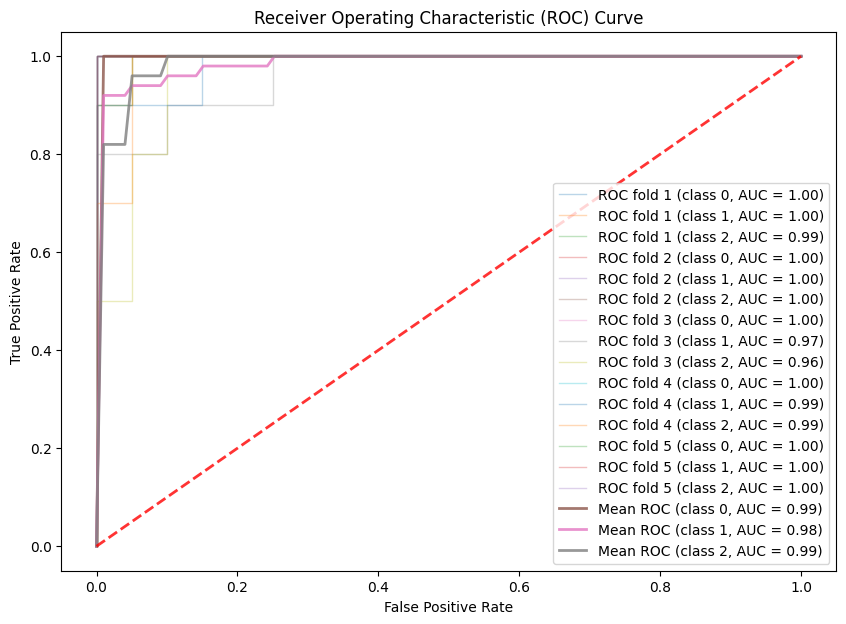

In [55]:
# Set up cross-validation
cv = StratifiedKFold(n_splits=5)
tprs = {i: [] for i in range(n_classes)}
aucs = {i: [] for i in range(n_classes)}
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(10, 7))

# Perform cross-validation
for i, (train, test) in enumerate(cv.split(X, y)):
    # Fit the model and predict probabilities
    rf_clf.fit(X[train], y[train])
    y_score = rf_clf.predict_proba(X[test])

    for j in range(n_classes):
        fpr, tpr, _ = roc_curve(y_bin[test, j], y_score[:, j])
        tprs[j].append(np.interp(mean_fpr, fpr, tpr))
        tprs[j][-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs[j].append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC fold {i+1} (class {j}, AUC = {roc_auc:.2f})')

# Plot the mean ROC curve for each class
for j in range(n_classes):
    mean_tpr = np.mean(tprs[j], axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, label=f'Mean ROC (class {j}, AUC = {mean_auc:.2f})', lw=2, alpha=.8)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
